In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# Load the files

In [2]:
loandf = pd.read_csv("loan.csv")
dictdf = pd.read_excel("Data_Dictionary.xlsx")

# Understand the Structrue

In [3]:
loandf.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Loan dataset is of size 39717 * 111. Analsying 111 columns is huge task. Remove unwanted columns

In [4]:
loandf.shape

(39717, 111)

In [5]:
print(loandf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


## Find out percentage of null entries in each column. Remove columsn if more than 30% of entries are null

In [6]:
nullInfo = round(100 *(loandf.isnull().sum()/len(loandf.index)), 2)
print(nullInfo)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [7]:
nullCol = nullInfo[nullInfo>30].keys()
loandf = loandf.drop(nullCol,axis=1)
loandf.shape

(39717, 53)

In [8]:
nullInfo = round(100 *(loandf.isnull().sum()/len(loandf.index)), 2)
print(nullInfo)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [9]:
nullInfo = loandf.isnull().sum(axis=1)
nullRows = nullInfo[nullInfo>5].keys()
print(len(nullRows))

0


## Still some of columns are having NULL values. Either impute with meaningful values or remove columns if not needed

In [10]:
loandf.loc[pd.isnull(loandf['emp_title']),['emp_title']] = "Job_NotDefined"
loandf['emp_title'].value_counts()

Job_NotDefined                     2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: emp_title, Length: 28821, dtype: int64

In [11]:
loandf['emp_length'].value_counts()


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [12]:
loandf['emp_length'].head()
loandf['emp_length'] =loandf['emp_length'].apply(lambda x:int(str(x).replace('year','').replace('s','').replace('<','').replace('+','').replace('nan','0')))
loandf['emp_length'].value_counts()
loandf.loc[loandf['emp_length']==0,['emp_length']] = -1#int(loandf['emp_length'].mean())
loandf['emp_length'].value_counts()



 10    8879
 1     7823
 2     4388
 3     4095
 4     3436
 5     3282
 6     2229
 7     1773
 8     1479
 9     1258
-1     1075
Name: emp_length, dtype: int64

In [13]:
loandf = loandf[~ loandf['pub_rec_bankruptcies'].isnull()]
loandf = loandf[~ loandf['last_pymnt_d'].isnull()]
loandf = loandf[~ loandf['last_credit_pull_d'].isnull()]
loandf = loandf[~ loandf['revol_util'].isnull()]
loandf = loandf[~ loandf['title'].isnull()]
loandf = loandf[~ loandf['title'].isnull()]
loandf = loandf.drop('collections_12_mths_ex_med',axis=1)
loandf = loandf.drop('chargeoff_within_12_mths',axis=1)
loandf.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

In [14]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0,0.0


In [15]:
# Analyze columns & Segregate them w.r.t Categorical, Continuous columns. 

In [16]:
categoricalCols=['home_ownership','verification_status','loan_status','purpose']
continuousCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc',
                'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','term','int_rate']


In [17]:
#Some of the columns are not used in out analysis. Either Drop them or ignore theam.
colNotUseful = ['member_id','pymnt_plan','url','zip_code','Addr_state']



count    38891.000000
mean       690.314934
std        631.968776
min         40.000000
25%        408.000000
50%        593.210000
75%        825.000000
max      60000.000000
Name: annual_inc, dtype: float64


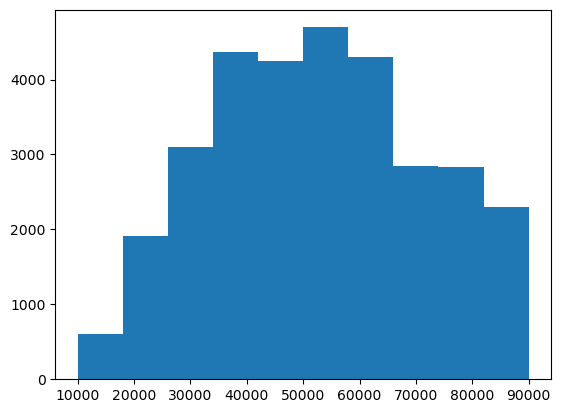

In [18]:
print((loandf['annual_inc']/100).describe())
#annual_inc column has outliers. Remove them 
loandf = loandf[(loandf['annual_inc']>=10000) & (loandf['annual_inc']<=90000  ) ]
plt.hist(loandf['annual_inc'])
plt.show()

In [19]:
loandf['int_rate'] = loandf['int_rate'].apply(lambda x:float(x.replace('%','')))


In [20]:
loandf['term'] = loandf['term'].apply(lambda x:int(str(x).replace('months','')))
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0,0.0


# Univariate analysis 

# Categorical columns analysis

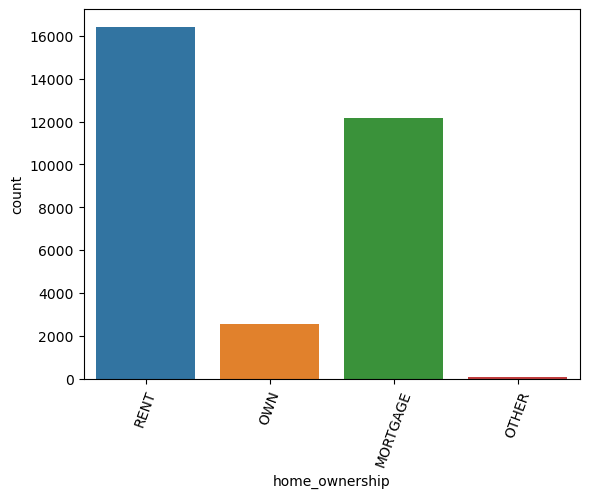

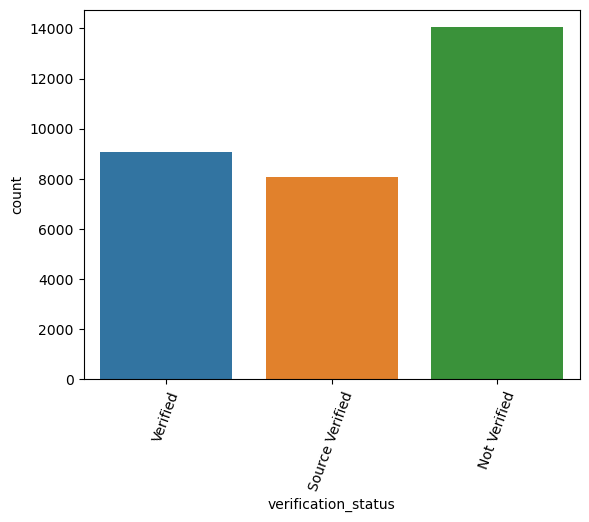

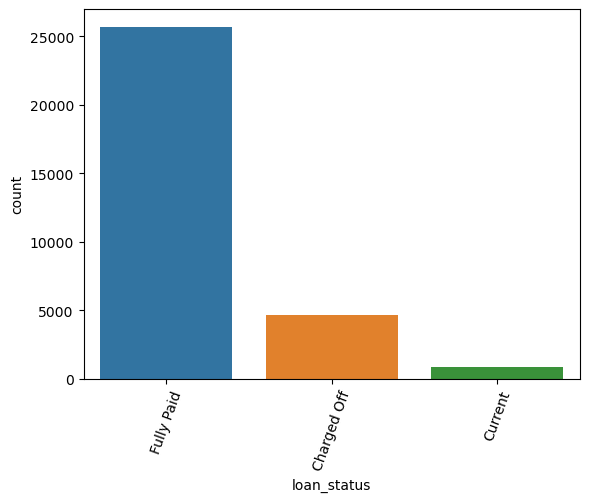

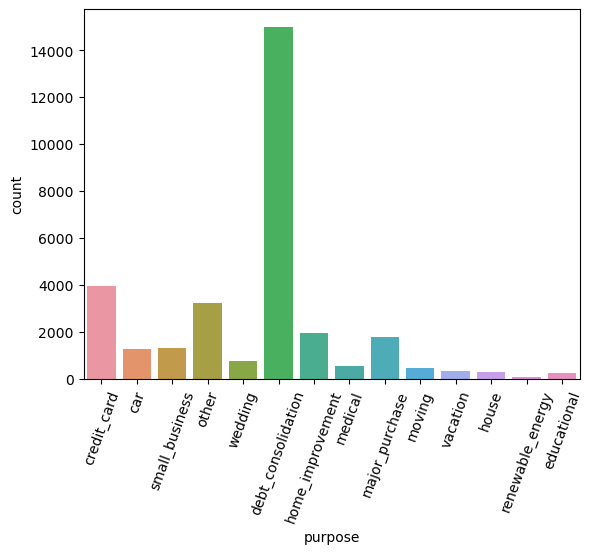

In [21]:

for col in categoricalCols:
    sns.countplot(x=loandf[col])
    plt.xticks(rotation=70)
    plt.show()
    
    

## Categorical columns :Results of analysis
### 1.People who are in Rent or their home is under Mortgage are major loan seekers
### 2.Top reasons for purchasing loans are Debt_consolidation, CreditCard Payments,other, Homeimprovement 
### 3.Among loan applicants still major portion of people are not yet verified. Thats a concern.

#### ------------------------
# Continuous Columns Analysis

In [22]:
#Analysing below continuous columns
#continuousCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc',
#                'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
#               'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

In [23]:
#loandf = loandf[((loandf['recoveries']>0) & (loandf['collection_recovery_fee']>0) & (loandf['total_rec_late_fee']>0))]

## Results of analysis
#### Majority of the people are either under 1 year or 10 year of employment length
#### Majority of the people having dti in the ranage of 10 to 25
#### Most of the pople are having total credit lines of around 10 to 20


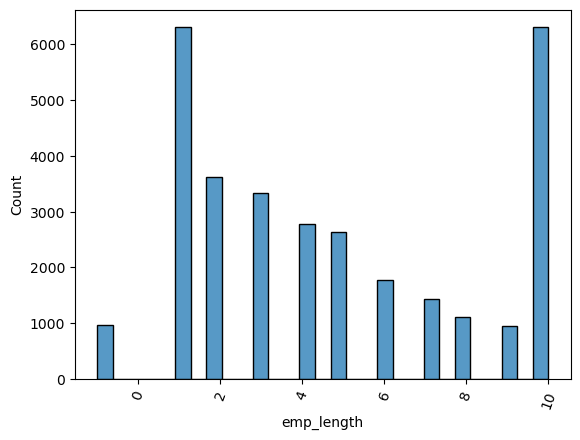

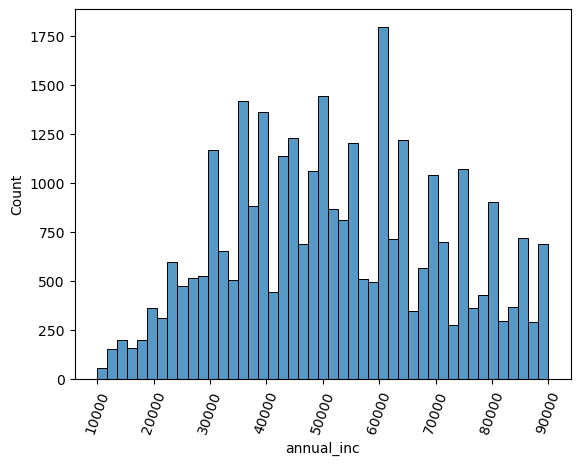

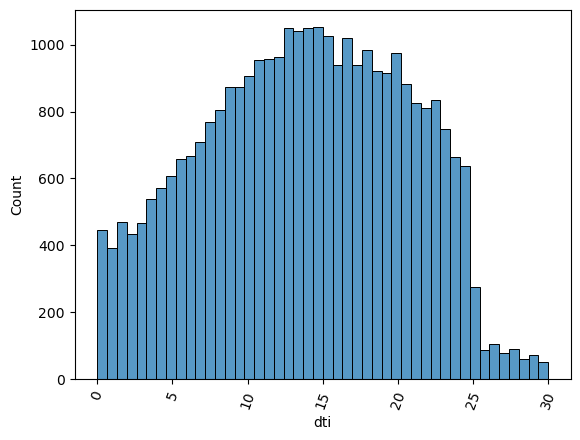

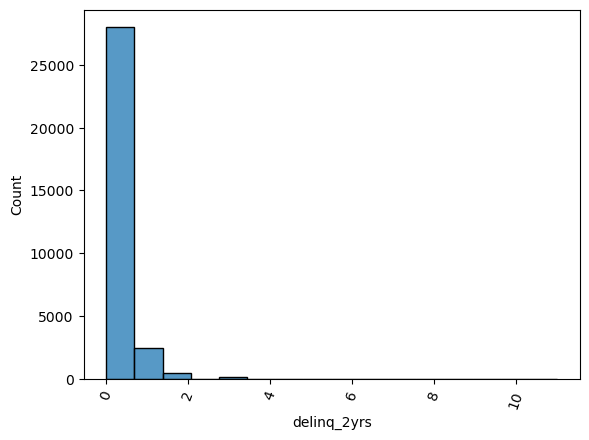

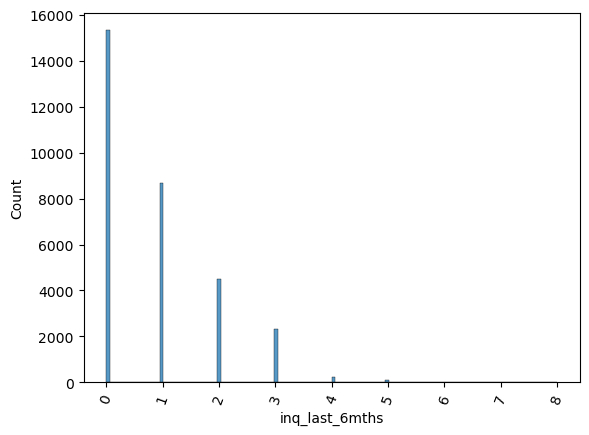

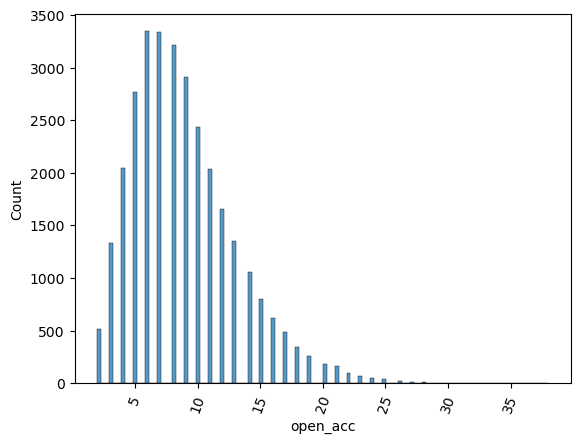

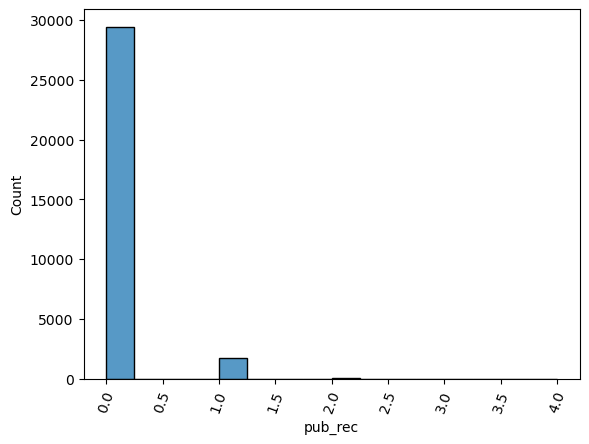

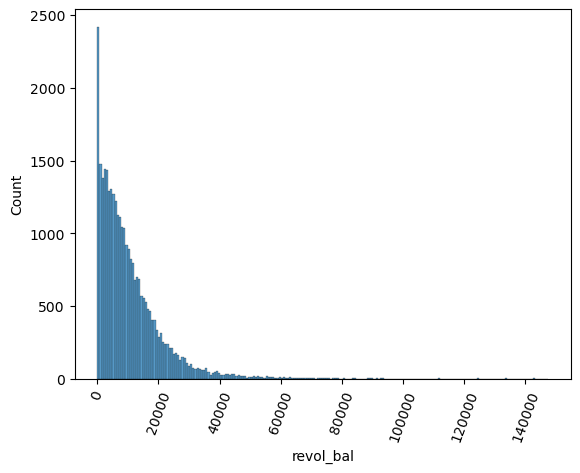

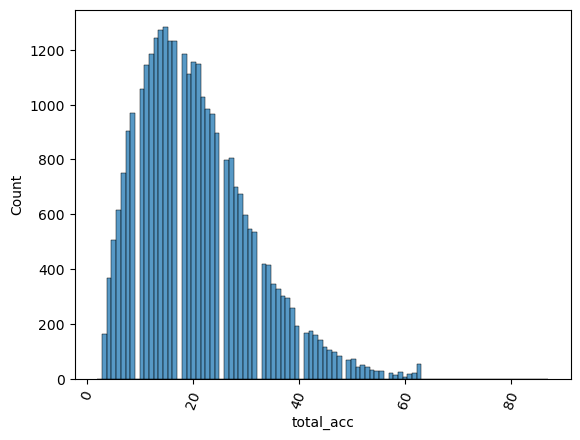

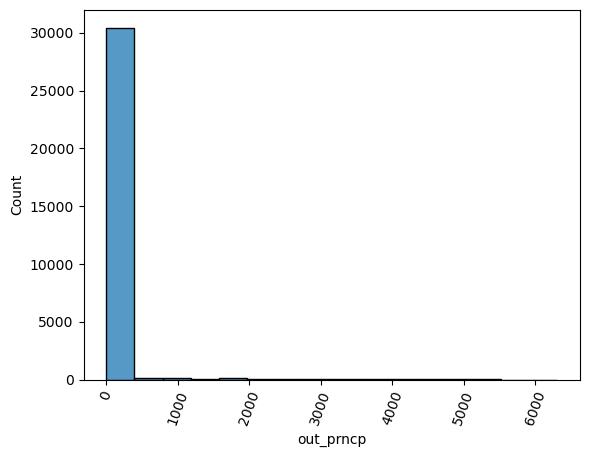

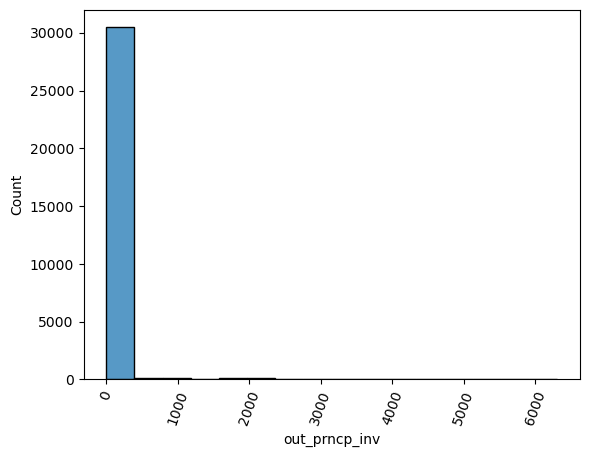

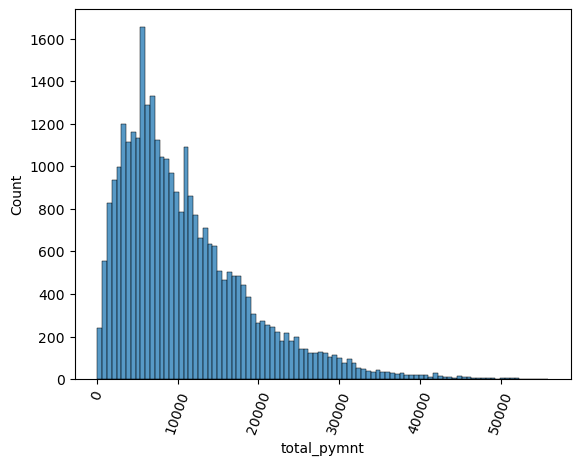

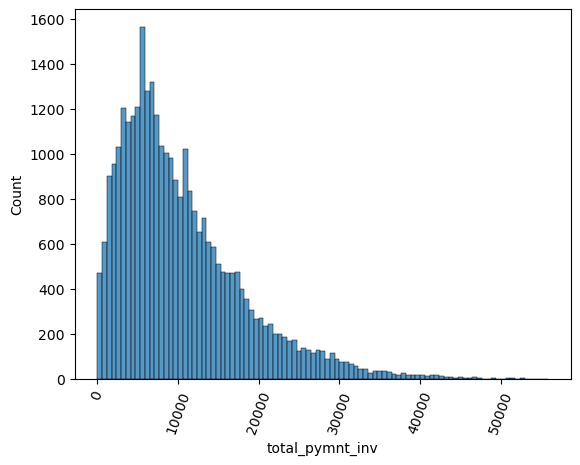

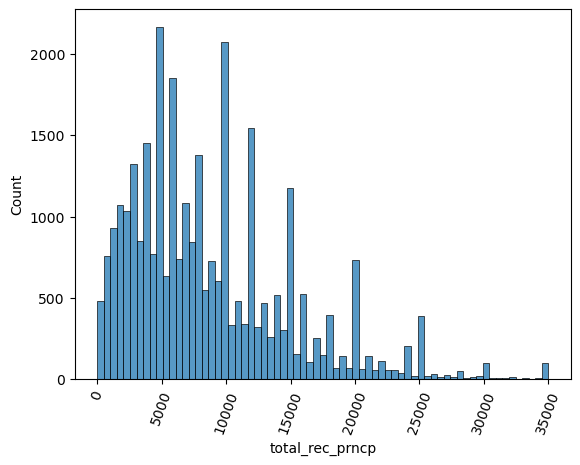

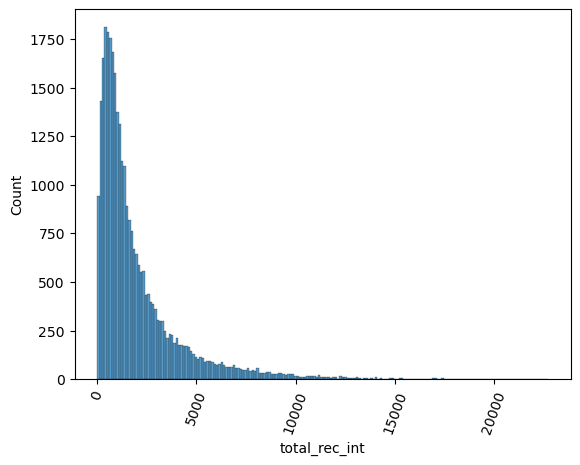

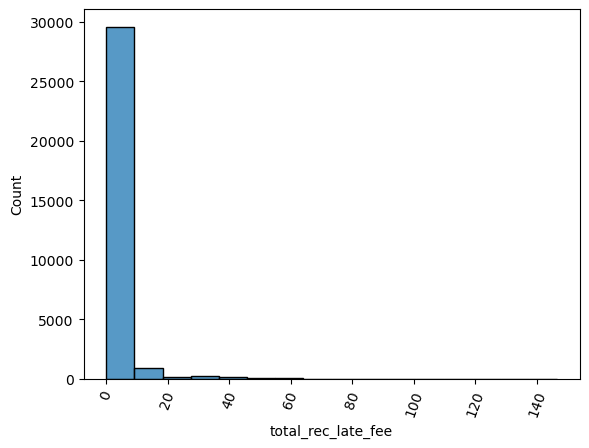

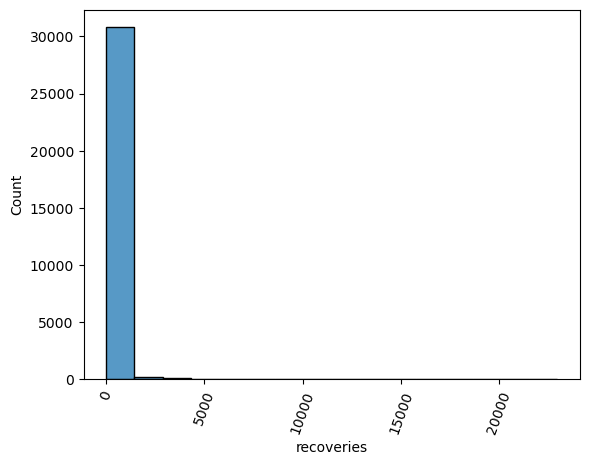

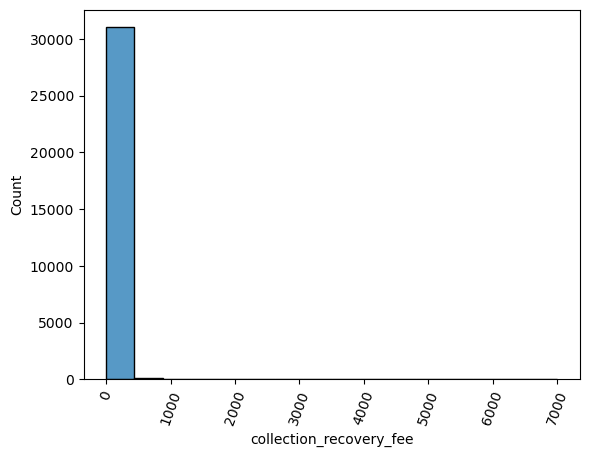

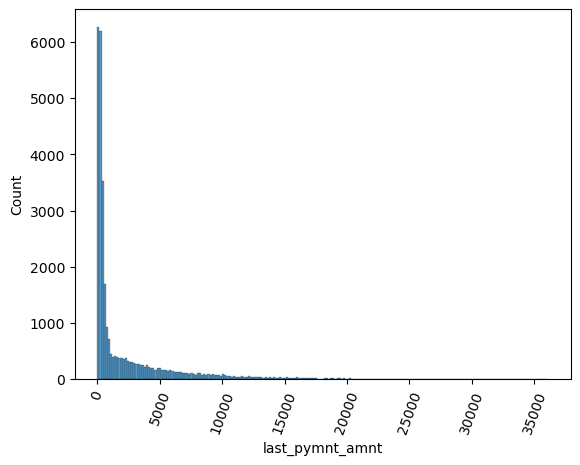

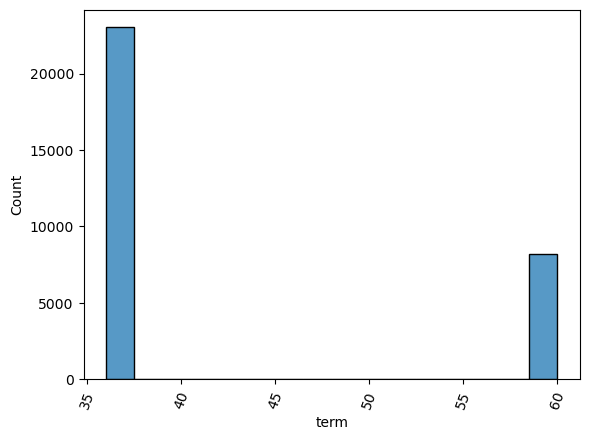

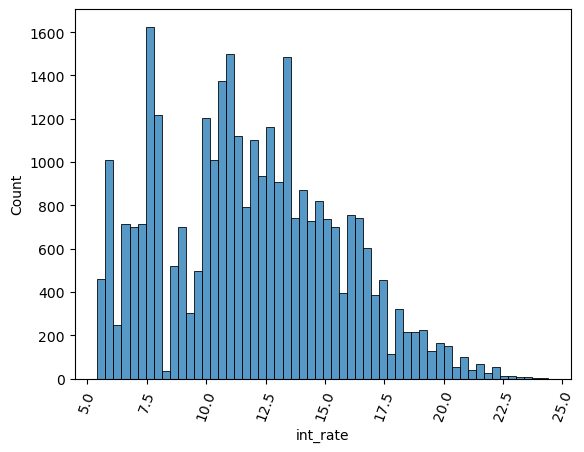

In [24]:
for col in continuousCols:
    sns.histplot(x=loandf[col])
    plt.xticks(rotation=70)
    plt.show()

### -----------------
## Bivariate Analysis

In [25]:
#categoricalCols=['home_ownership','verification_status','loan_status','purpose']
#continuousCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc',
 #               'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
 #               'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

#Cat vs Continuous
#for col1 in categoricalCols:
    #for col2 in continuousCols:
       # if col1!=col2:
          #  plt.figure(figsize=(4,3))
          #  sns.boxplot(x=loandf[col1],y=loandf[col2])
           # plt.xticks(rotation=70)
           # plt.show()

      


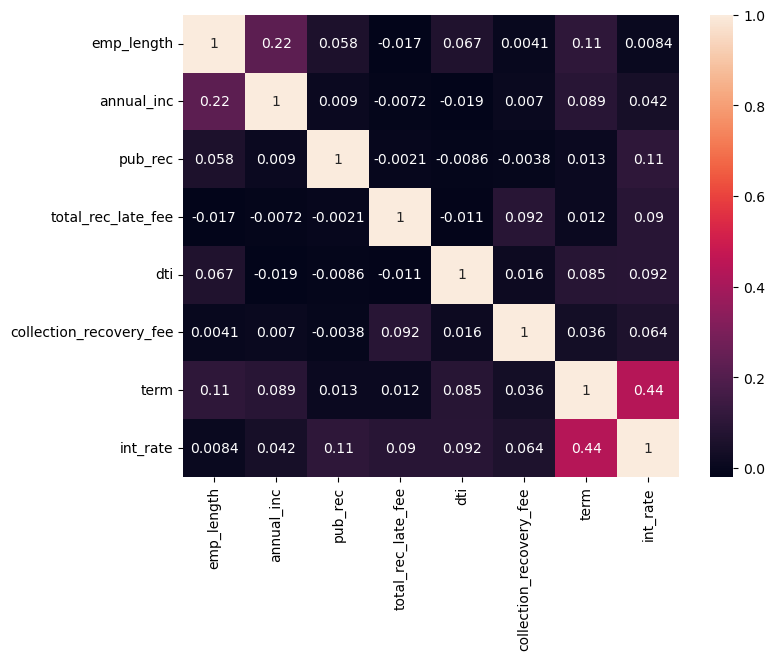

In [26]:
contCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','pub_rec','revol_bal','total_acc',
                'total_rec_late_fee','recoveries','collection_recovery_fee','term','int_rate']

#for col1 in contCols:
#    plt.figure(figsize=(4,3))
#    sns.scatterplot(x=loandf['loan_status'],y=loandf[col1])
#    plt.show()
    
plt.figure(figsize=(8,6))
sns.heatmap(loandf.loc[:,['emp_length','annual_inc','pub_rec','total_rec_late_fee','dti','collection_recovery_fee','term','int_rate']].corr(),annot=True)
plt.show()

#Among people who take loan, with increase in employment tenure, tendency of derrogatory public records increases,Spending towards dept payment increases
#

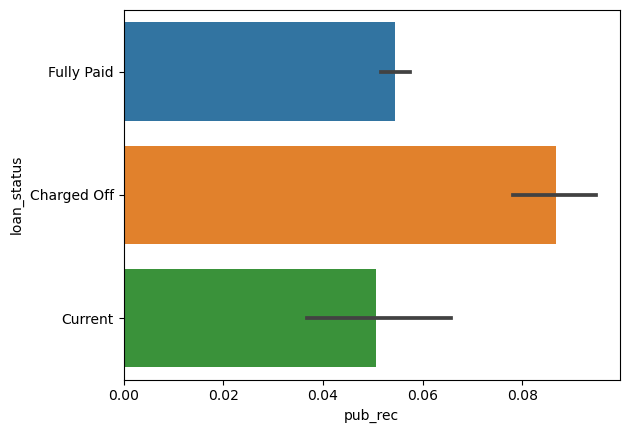

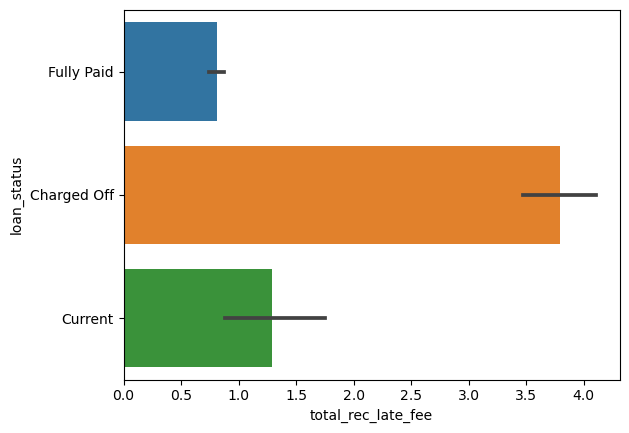

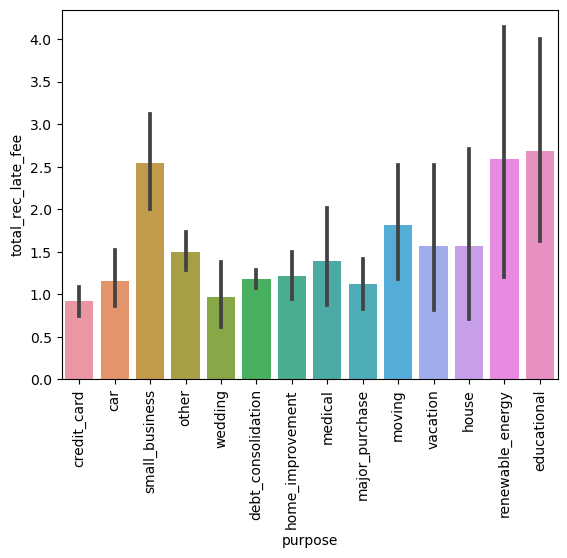

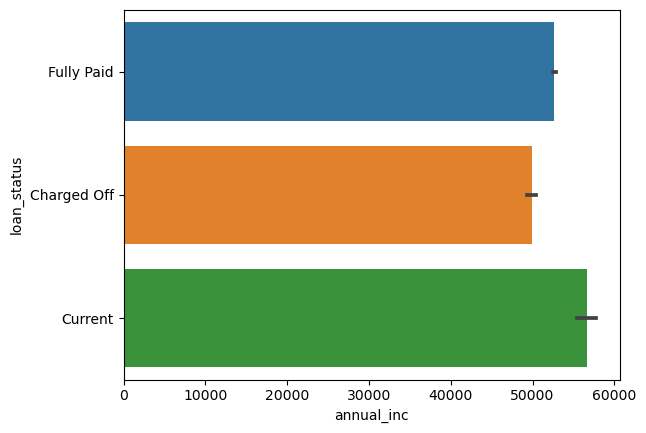

In [27]:
analyseLoanStatusCol=['pub_rec','total_rec_late_fee']

for col in analyseLoanStatusCol:
    sns.barplot(x=loandf[col],y=loandf['loan_status'])
    plt.show()


#sns.barplot(x=loandf['pub_rec'],y=loandf['loan_status'])
#plt.show()

# People who kept their home as mortgae have higher public derogatory incidents.
#sns.barplot(x=loandf['home_ownership'],y=loandf['pub_rec'])
#plt.show()

#People who took loan for with the reason 'renewable energy', 'education', 'small business' are paying relativelt higher late payment fee.
sns.barplot(x=loandf['purpose'],y=loandf['total_rec_late_fee'])
plt.xticks(rotation=90)
plt.show()

#recoveriesdf = loandf[loandf['recoveries']>0]
sns.barplot(x=loandf['annual_inc'],y=loandf['loan_status'])
plt.show()

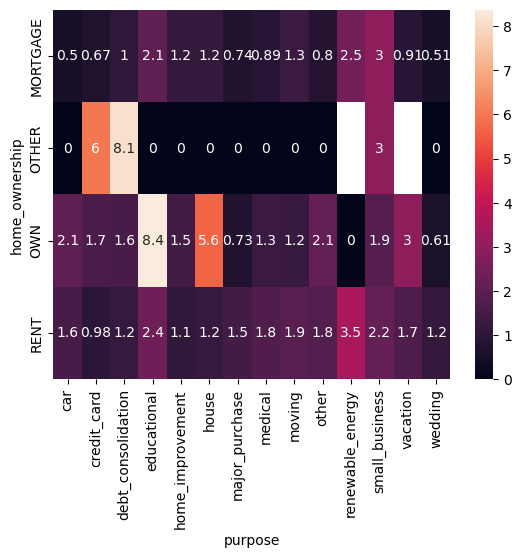

In [28]:
#categoricalCols=['home_ownership','verification_status','loan_status','purpose']
#contCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','pub_rec','revol_bal','total_acc',
 #               'total_rec_late_fee','recoveries','collection_recovery_fee']
res =pd.pivot_table(data=loandf, index="home_ownership", columns="purpose", values="total_rec_late_fee", aggfunc=np.mean)
sns.heatmap(res,annot=True)
plt.show()

In [29]:
#loandf.info()
loandf['pymnt_plan'].value_counts()

n    31203
Name: pymnt_plan, dtype: int64

0.000000     29593
15.000000      217
15.000000       51
30.000000       44
15.000000       38
             ...  
15.000000        1
35.286832        1
14.957851        1
67.606386        1
52.262227        1
Name: total_rec_late_fee, Length: 1028, dtype: int64


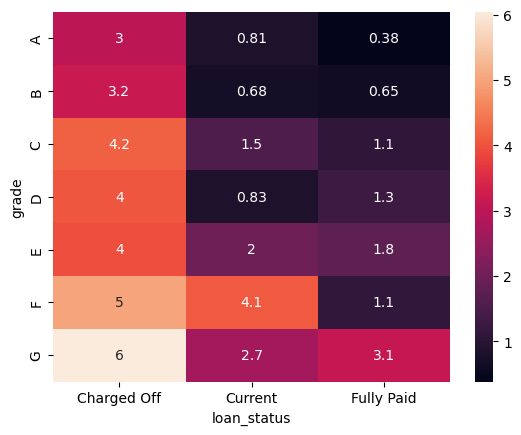

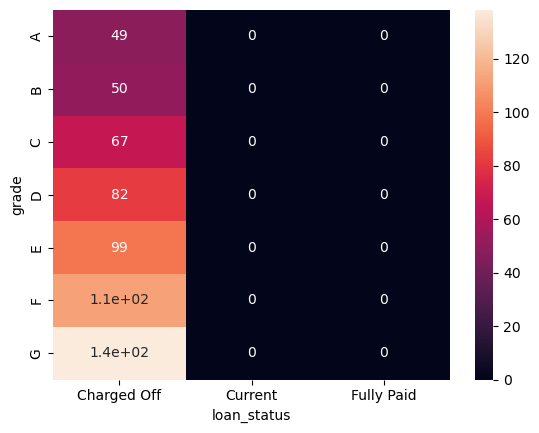

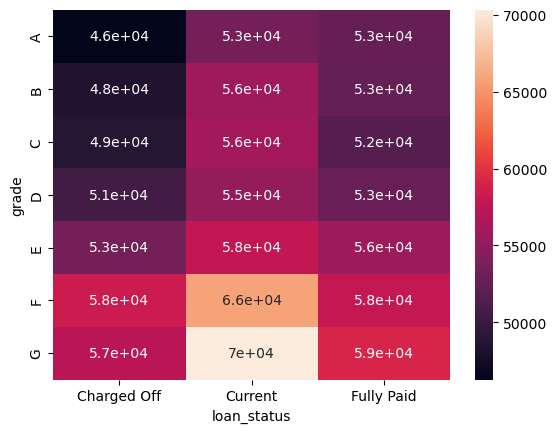

In [30]:
#categoricalCols=['home_ownership','verification_status','loan_status','purpose']
#continuousCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc',
 #               'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
 #               'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

#Cat vs Continuous
#for col1 in categoricalCols:
    #for col2 in continuousCols:
       # if col1!=col2:
          #  plt.figure(figsize=(4,3))
          #  sns.boxplot(x=loandf[col1],y=loandf[col2])
           # plt.xticks(rotation=70)
           # plt.show()
#sns.barplot(x=loandf['sub_grade'],y=loandf['loan_status'])
#plt.show()

print(loandf['total_rec_late_fee'].value_counts())
res =pd.pivot_table(data=loandf, index="grade", columns="loan_status", values="total_rec_late_fee", aggfunc=np.mean)
sns.heatmap(res,annot=True)
plt.show()


res =pd.pivot_table(data=loandf, index="grade", columns="loan_status", values="collection_recovery_fee", aggfunc=np.mean)
sns.heatmap(res,annot=True)
plt.show()

res =pd.pivot_table(data=loandf, index="grade", columns="loan_status", values="annual_inc", aggfunc=np.mean)
sns.heatmap(res,annot=True)
plt.show()



In [31]:
loandf.iloc[:,10:25].head(10)

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs
0,Job_NotDefined,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0
1,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0
2,Job_NotDefined,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0
3,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0
4,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0
5,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0
6,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0
7,MKC Accounting,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0
8,Job_NotDefined,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0
9,Starbucks,1,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0


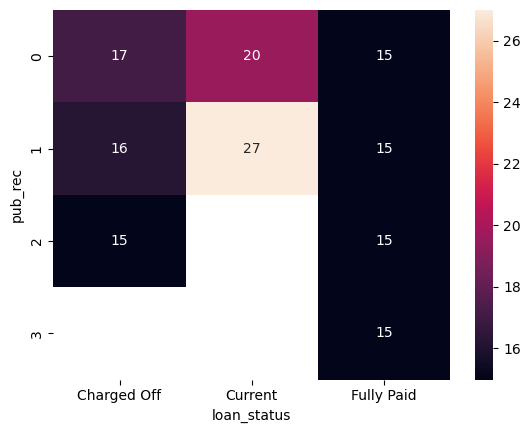

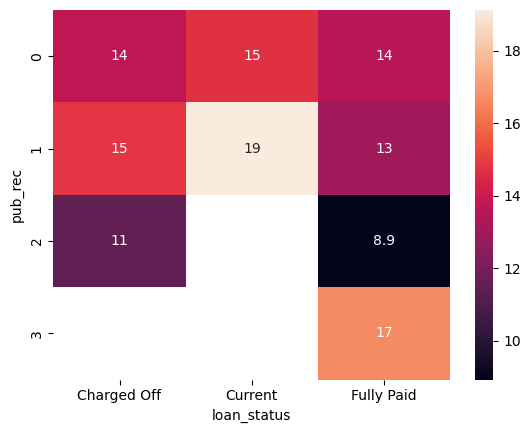

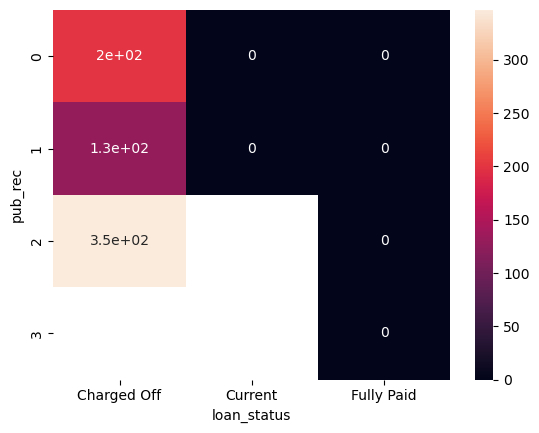

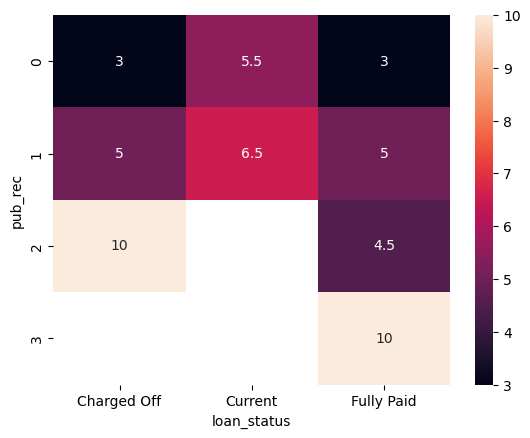

In [32]:
latePaydf = loandf[loandf['total_rec_late_fee']>0]

res =pd.pivot_table(data=latePaydf, index="grade", columns='pub_rec', values="total_rec_late_fee", aggfunc=np.mean)
#sns.heatmap(res,annot=True)

#sns.scatterplot(x=latePaydf['pub_rec'], y=latePaydf['total_rec_late_fee'])

#plt.show()
#categoricalCols=['home_ownership','verification_status','loan_status','purpose']
#continuousCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc',
 #               'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
 #               'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

colInterested=['total_rec_late_fee','dti','recoveries','emp_length']

for col in colInterested:
    res =pd.pivot_table(data=latePaydf, index="pub_rec", columns='loan_status', values=col, aggfunc=np.median)
    sns.heatmap(res,annot=True)
    plt.show()
    


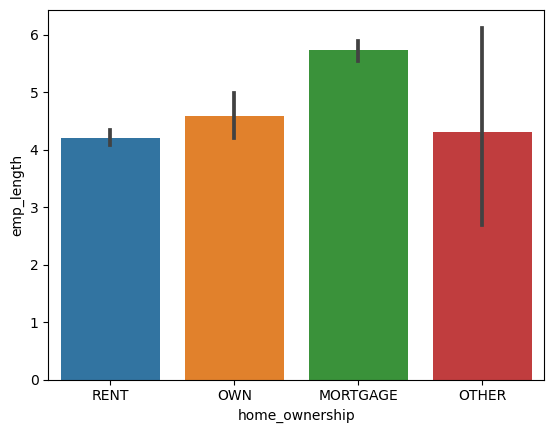

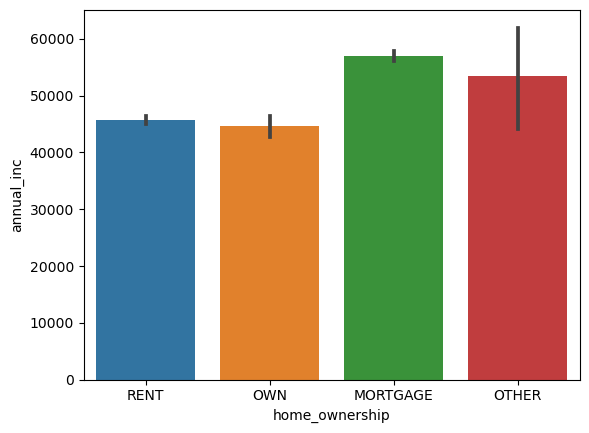

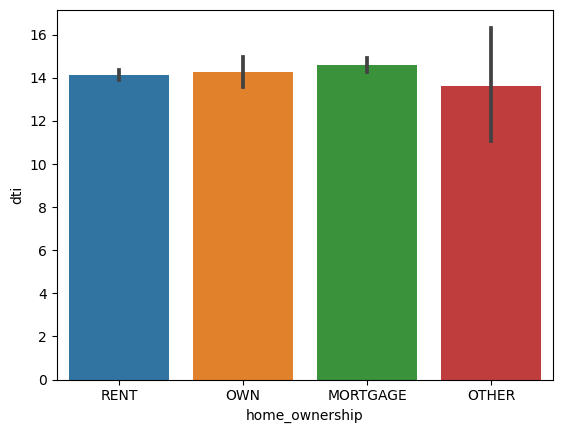

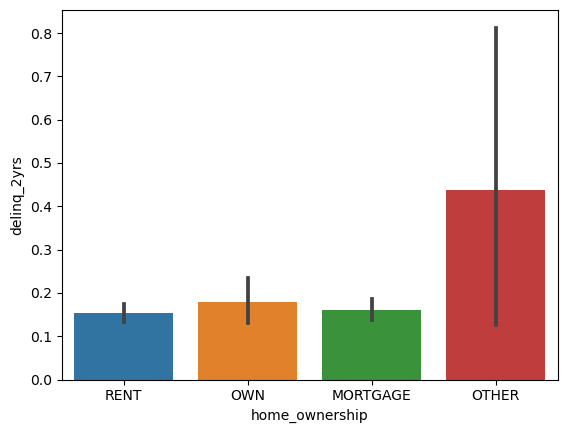

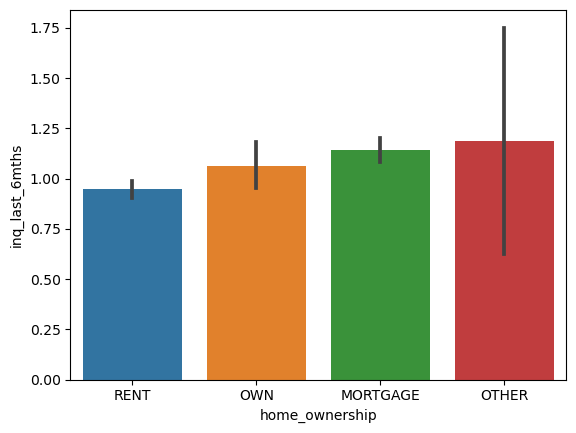

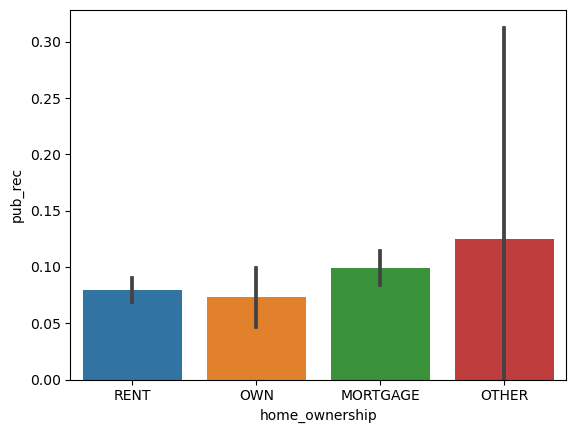

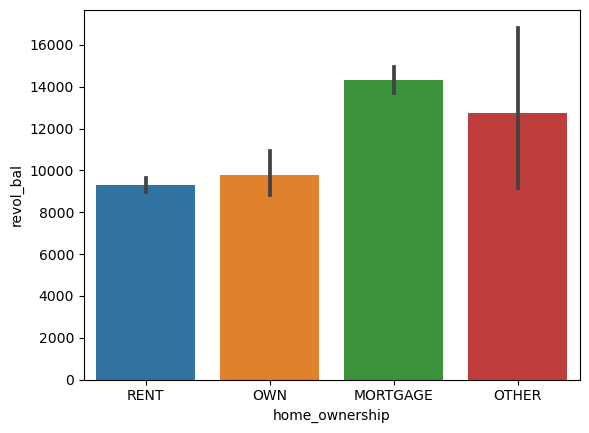

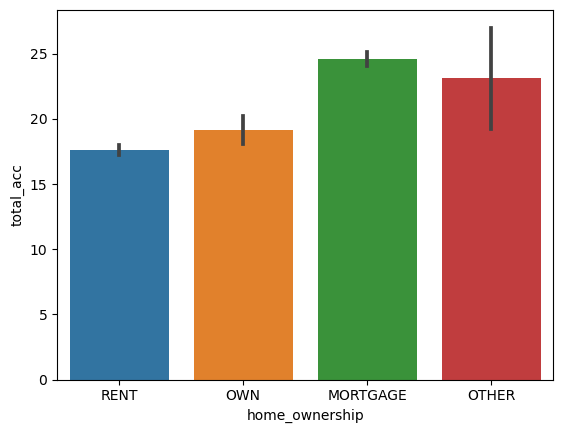

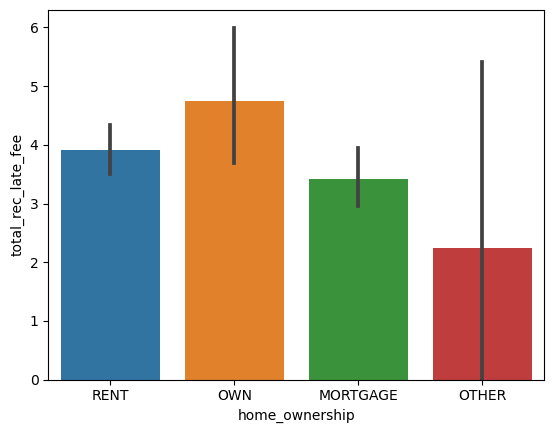

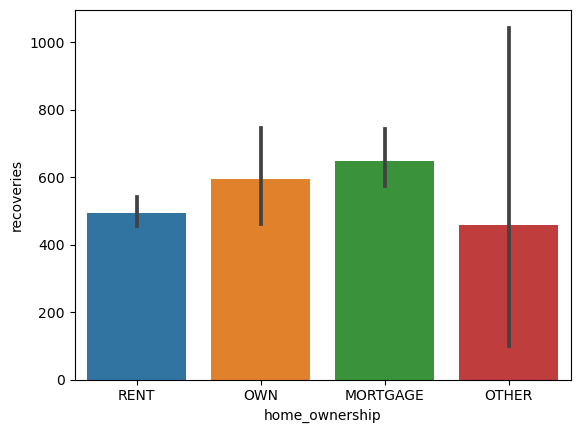

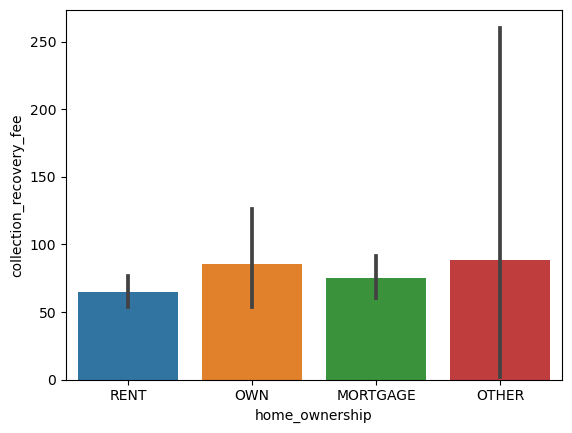

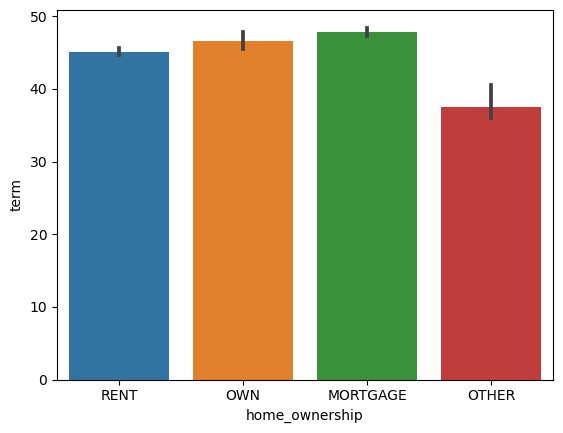

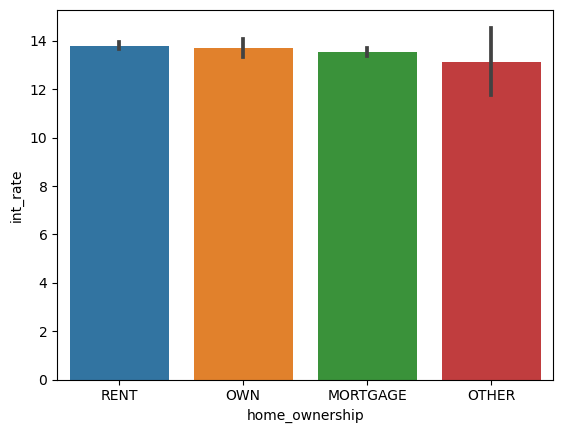

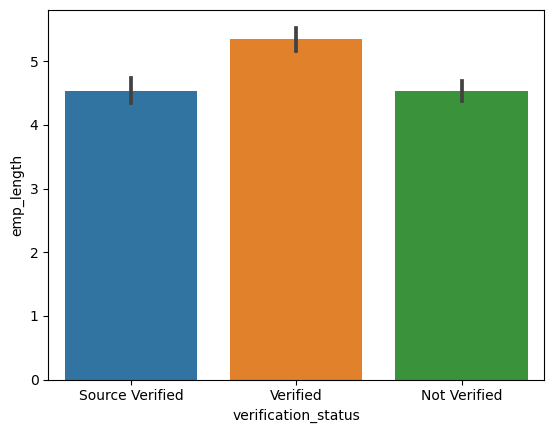

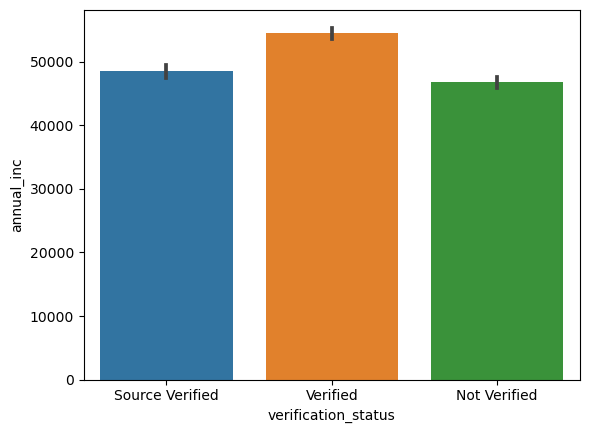

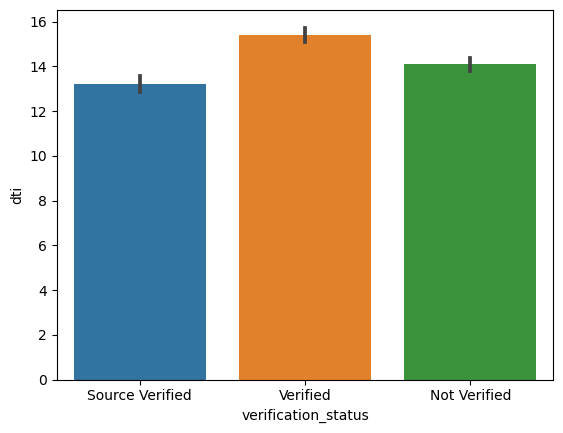

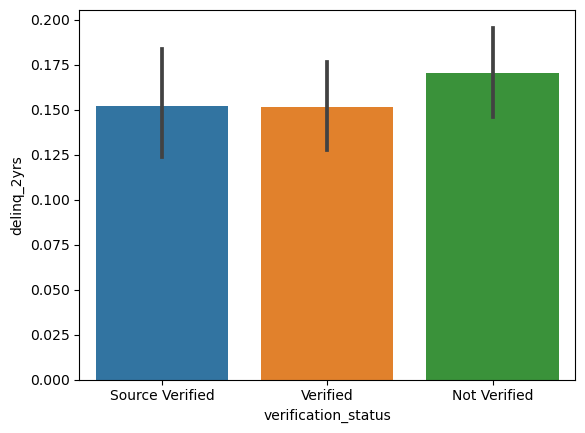

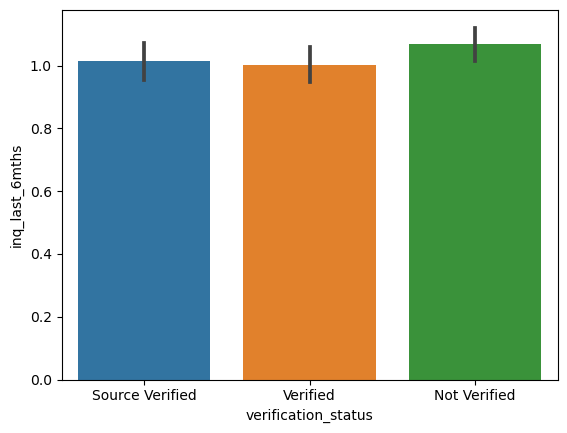

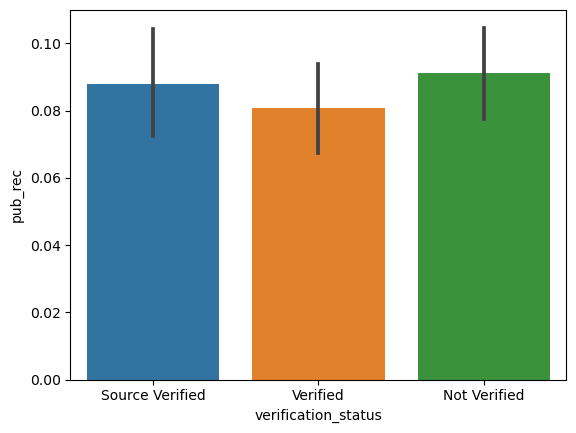

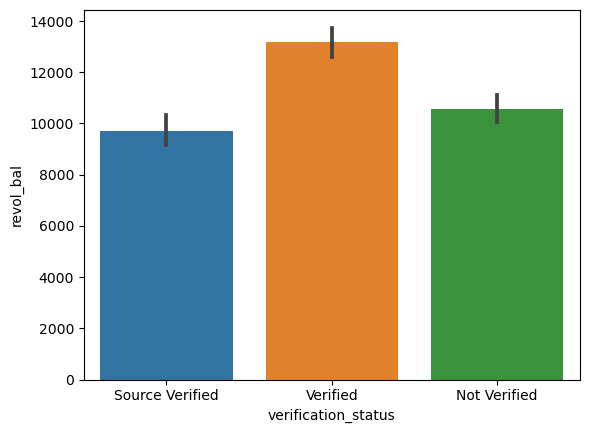

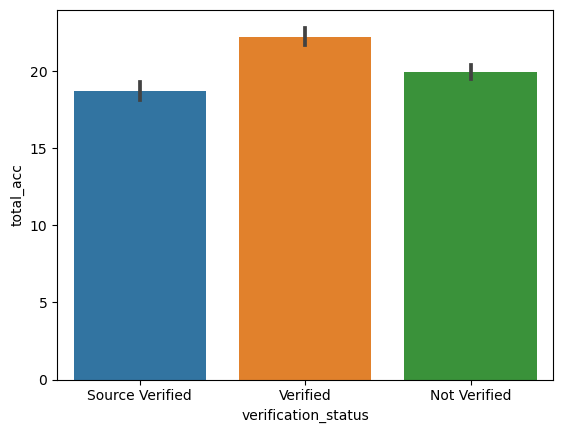

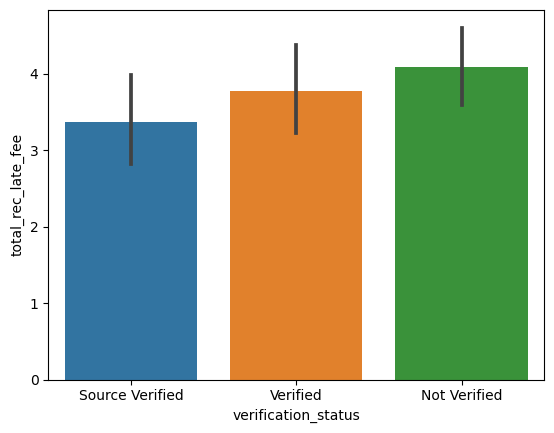

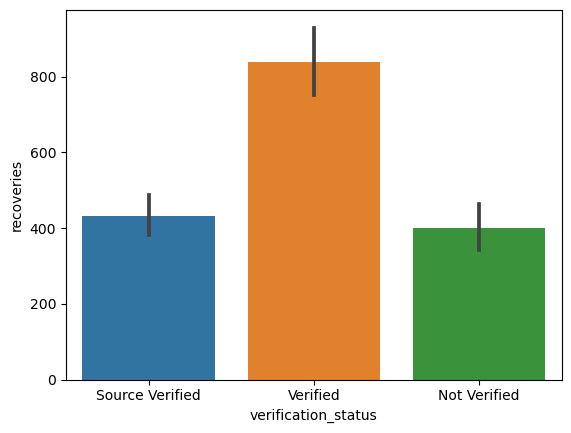

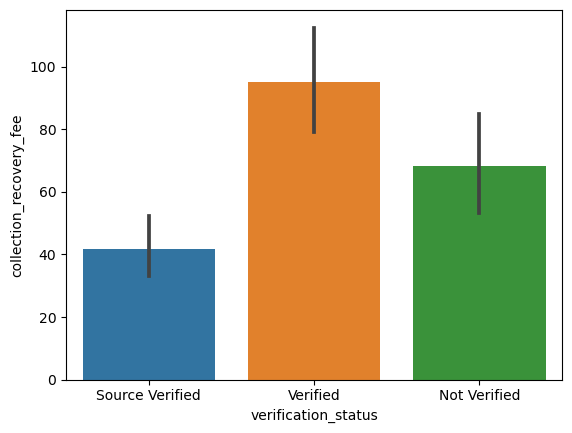

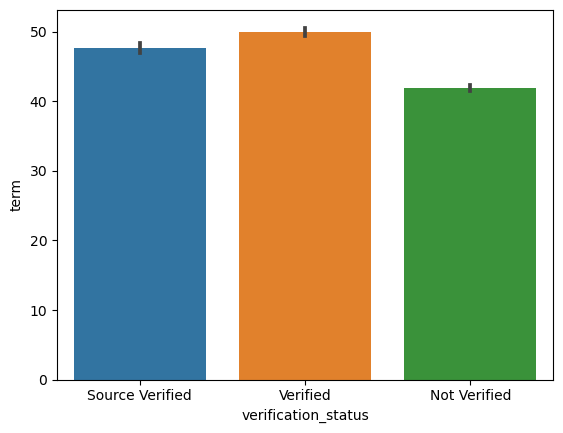

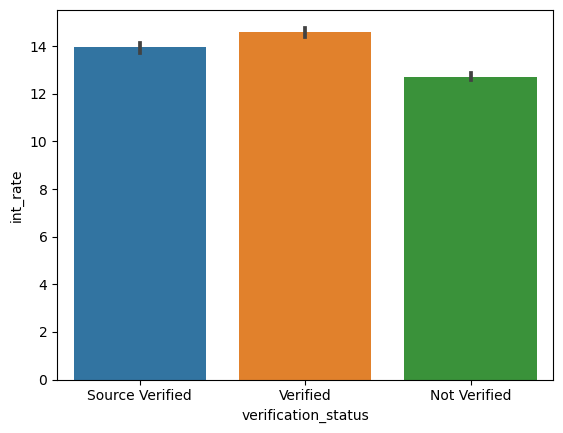

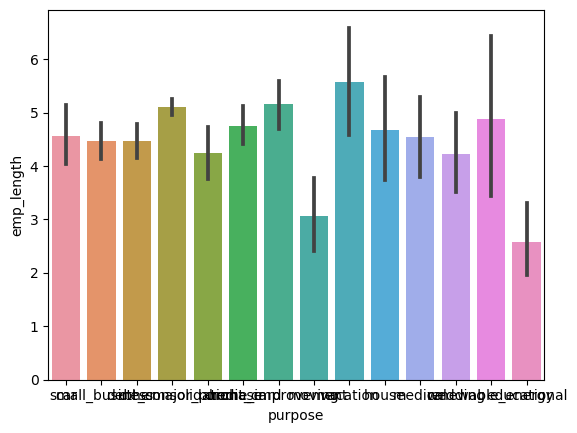

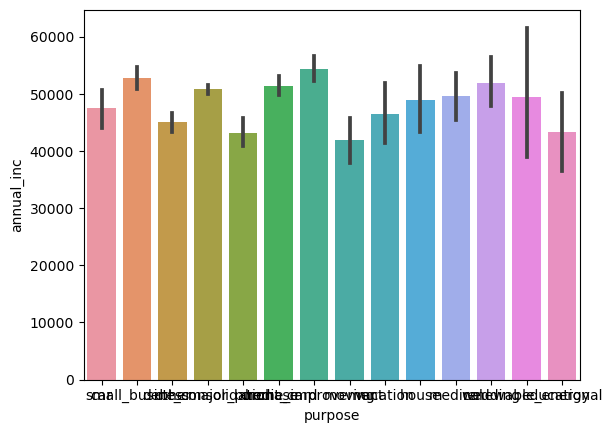

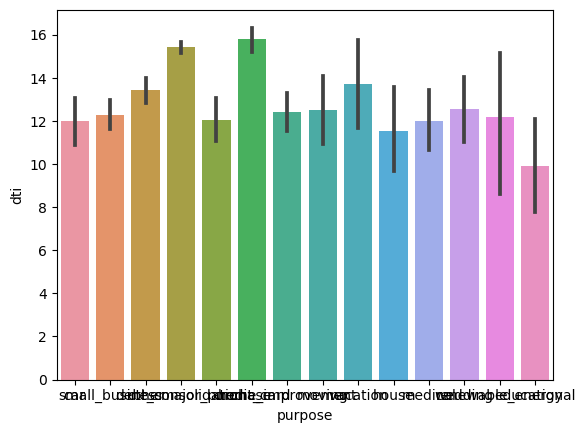

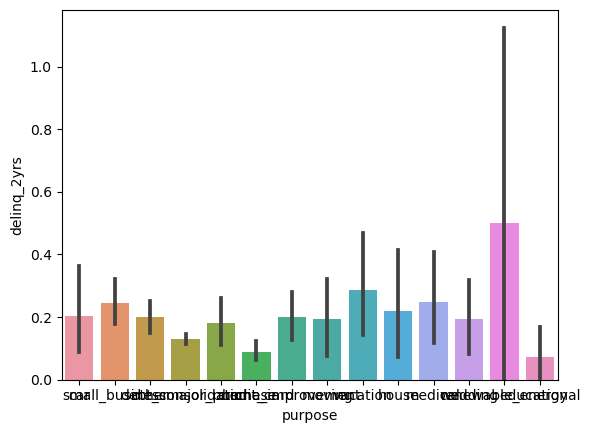

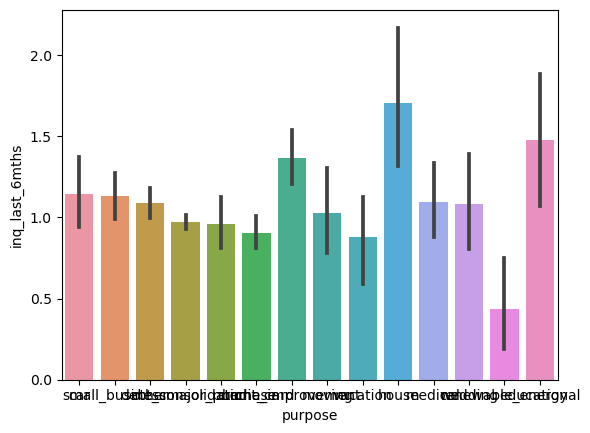

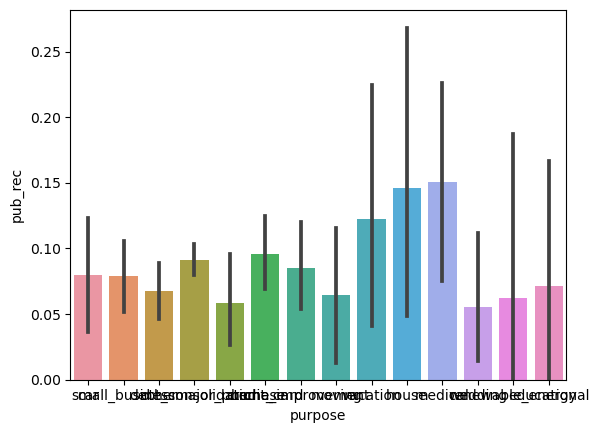

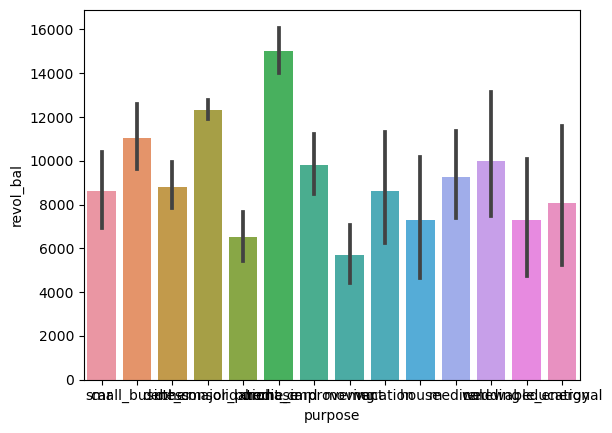

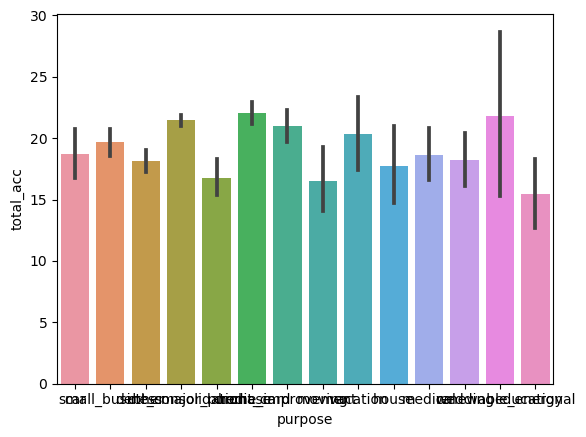

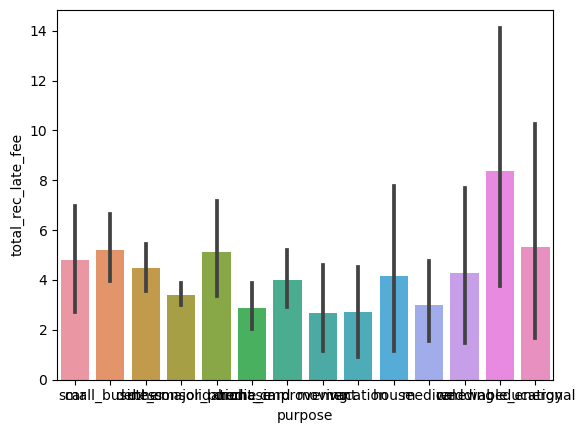

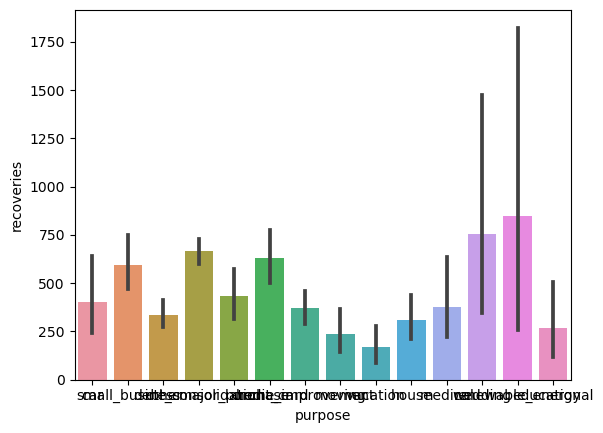

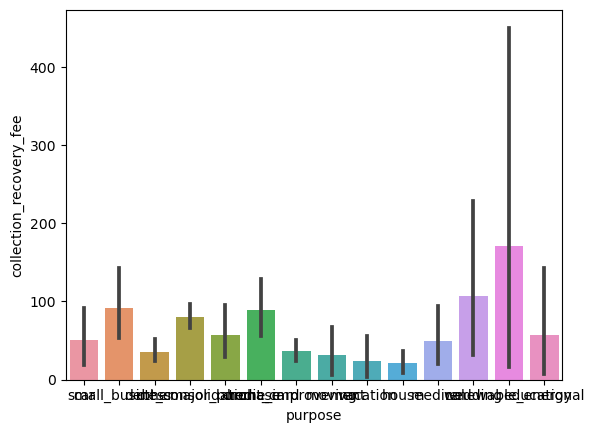

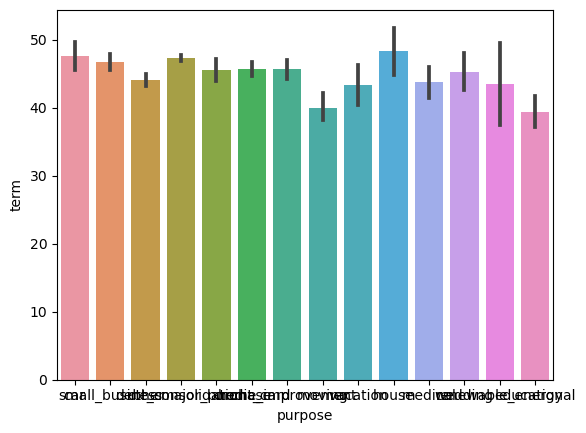

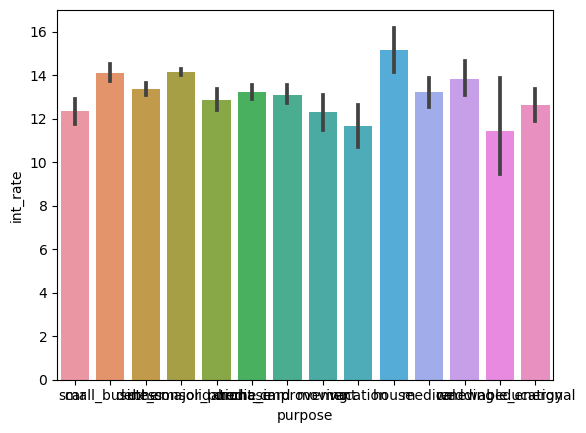

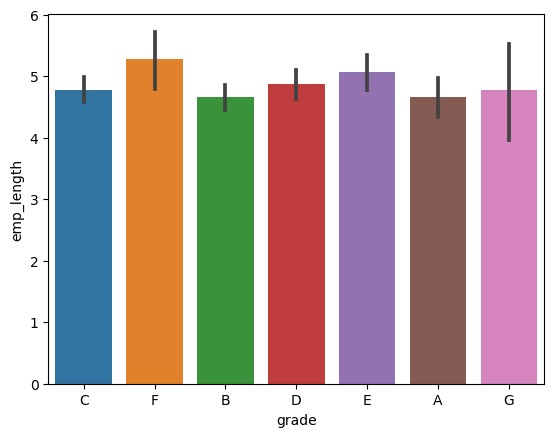

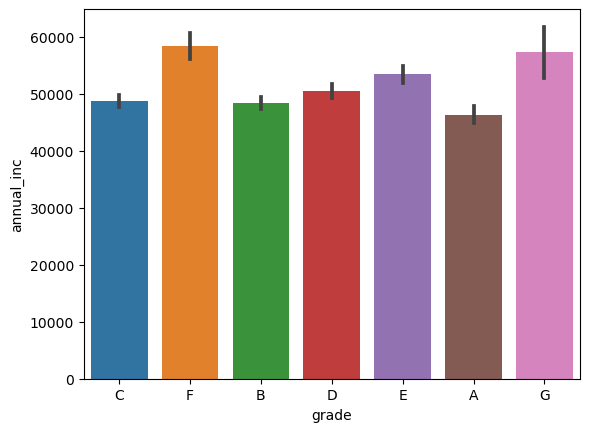

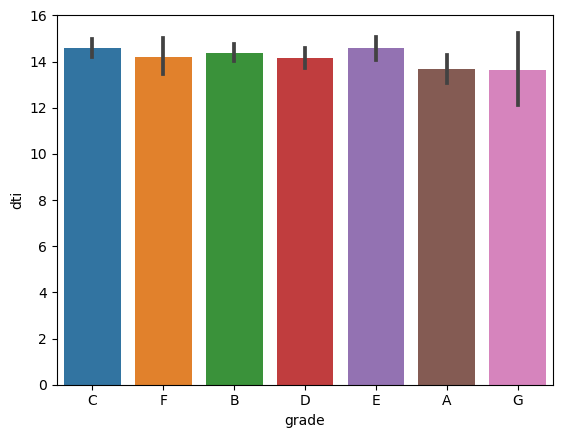

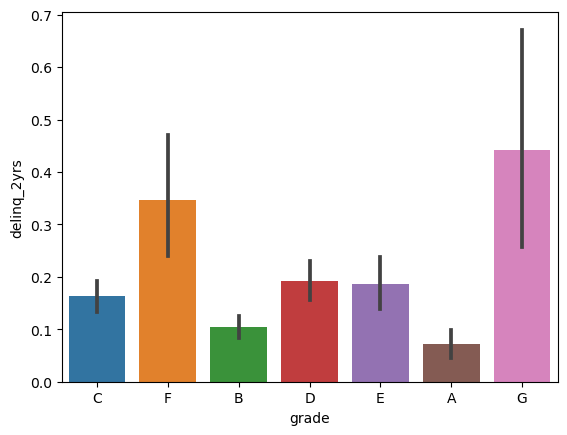

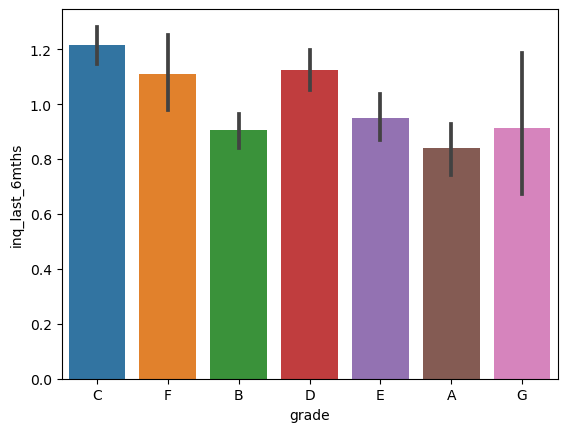

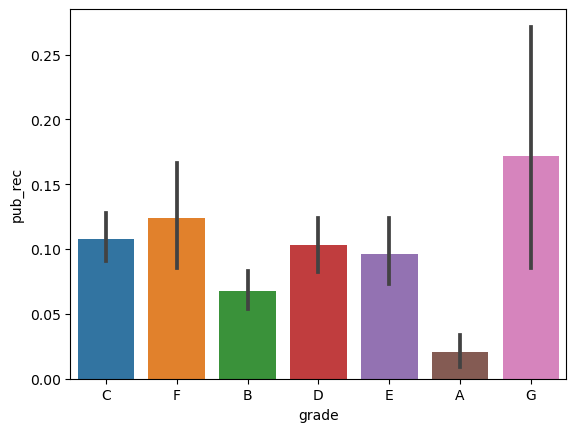

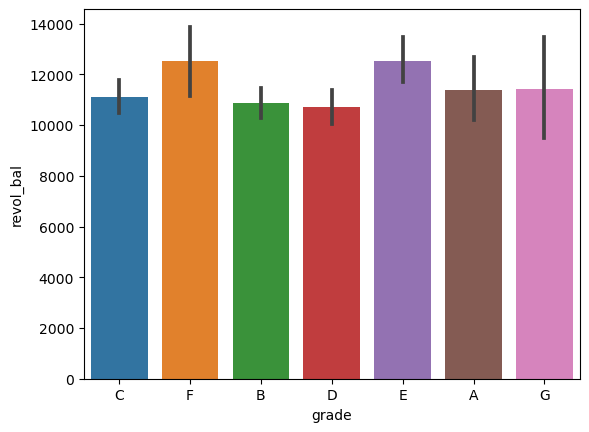

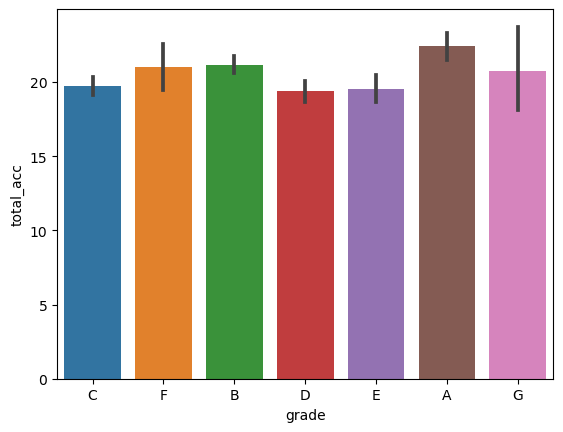

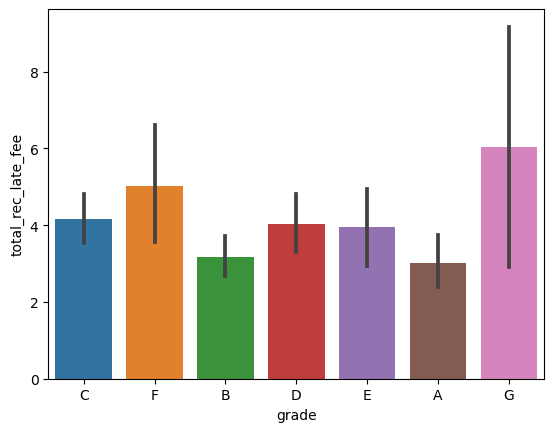

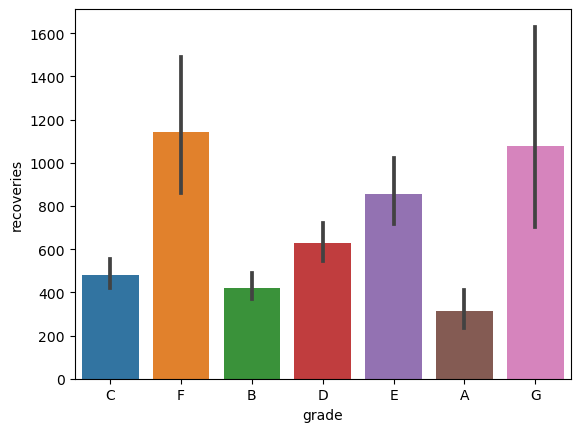

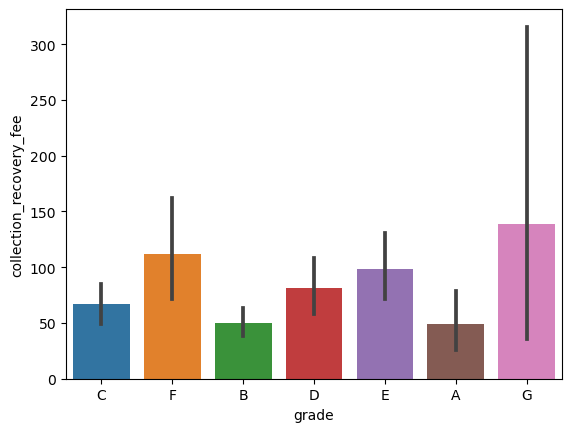

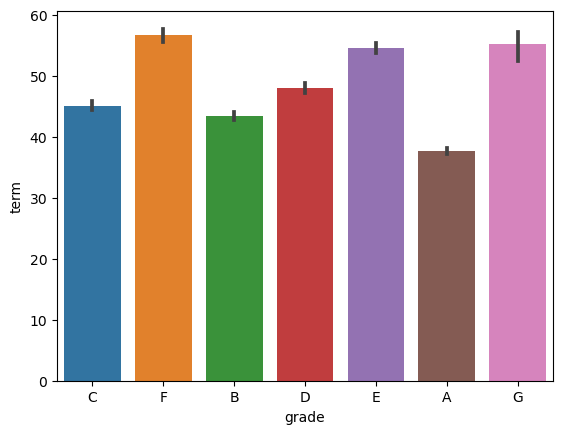

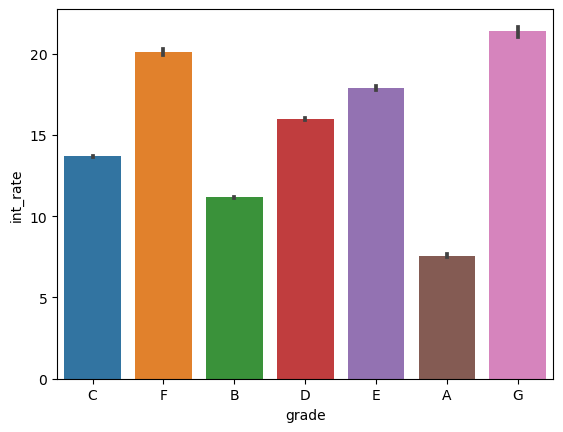

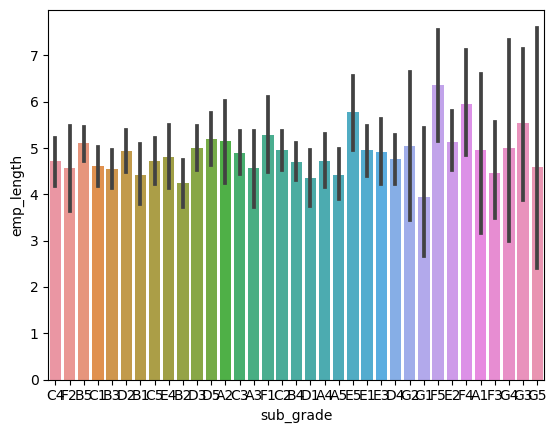

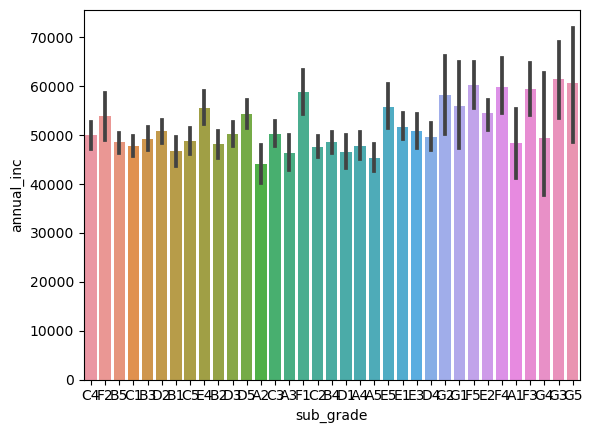

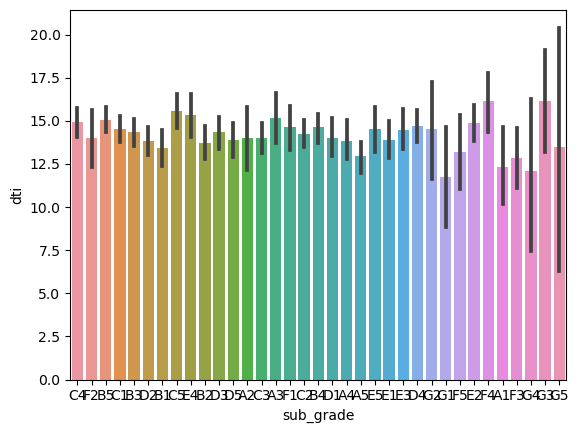

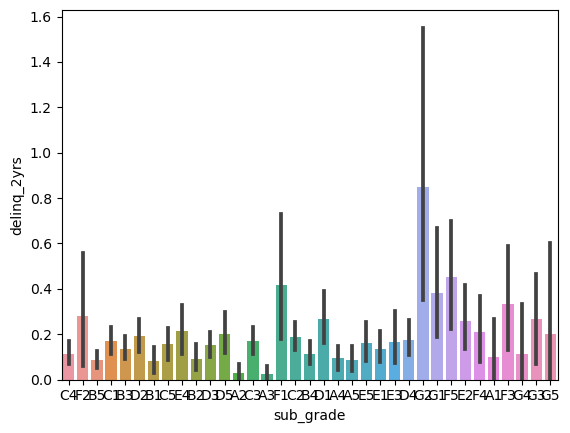

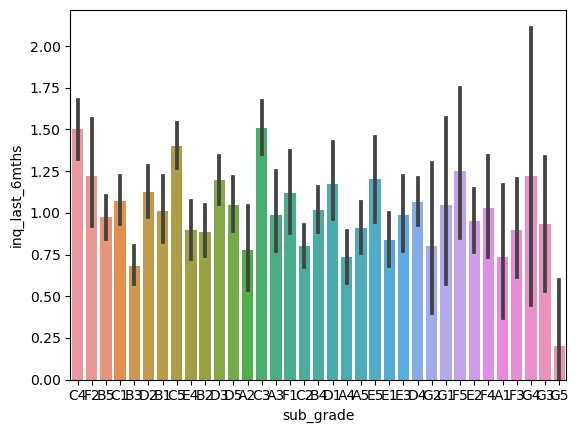

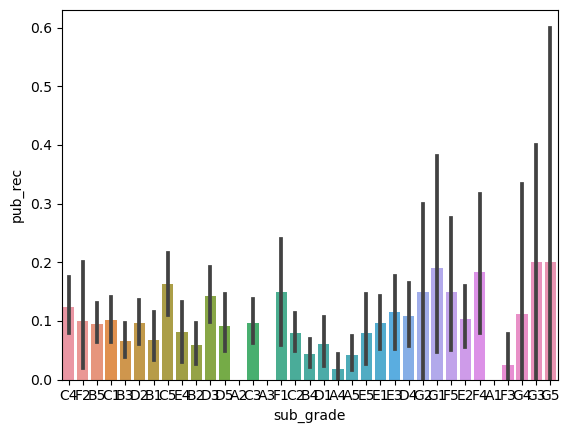

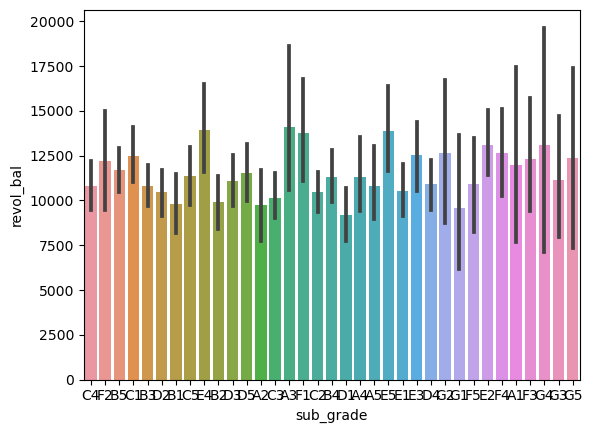

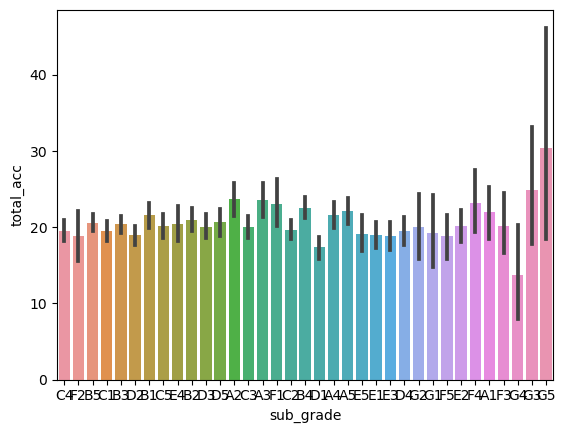

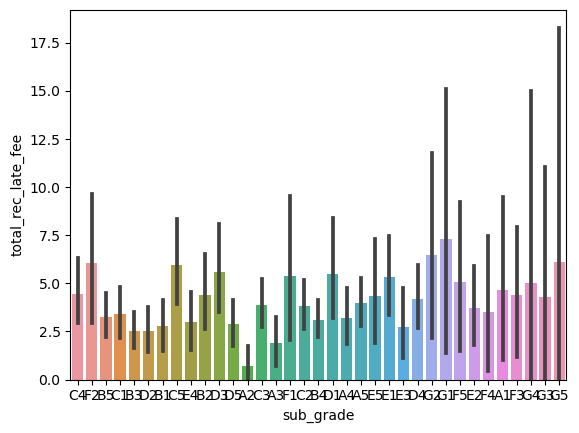

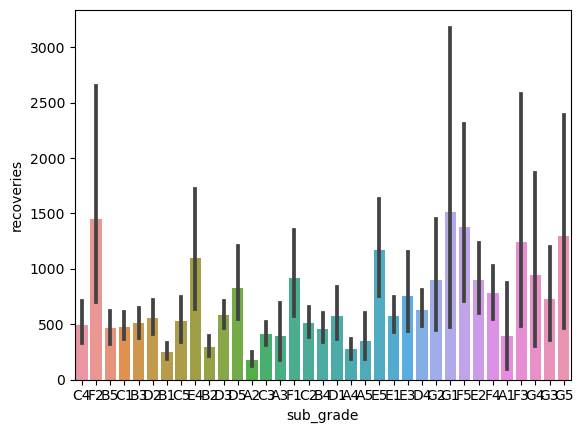

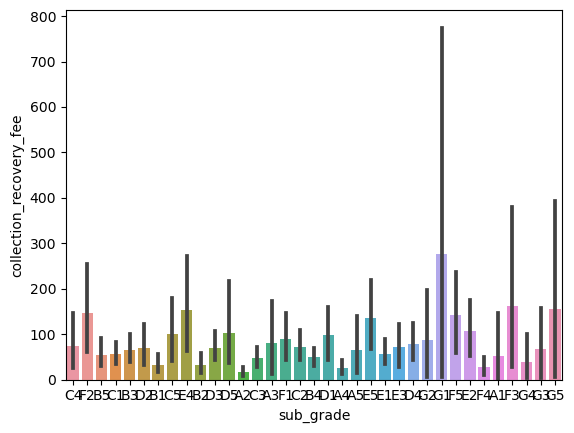

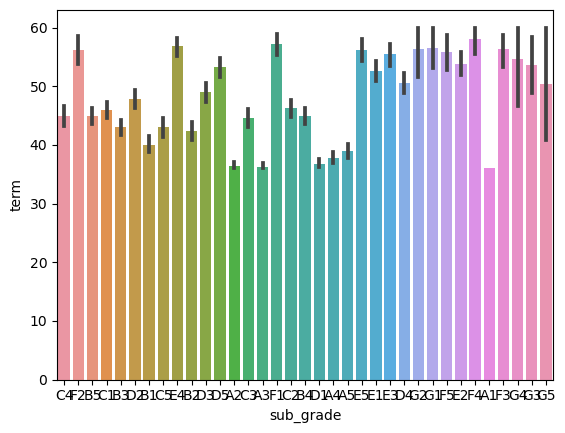

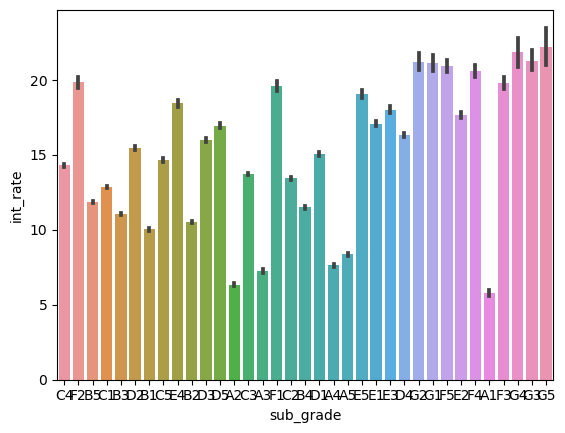

In [33]:
defaultersdf = loandf[loandf['loan_status']=="Charged Off"]
#categoricalCols=['home_ownership','verification_status','loan_status','purpose']
#continuousCols=['emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc',
 #               'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
 #               'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

catCols=['home_ownership','verification_status','purpose','grade','sub_grade']

for row in catCols:
    for col in contCols:
        if row!=col:
            sns.barplot(x=defaultersdf[row],y=defaultersdf[col])
            plt.show()


In [34]:
loandf['loan_status'].value_counts()

Fully Paid     25711
Charged Off     4623
Current          869
Name: loan_status, dtype: int64